#### 구글은 Header값 반드시 넣어줘야함 bot으로 인식할수 있기때문에 !
#### 데이터값도 넣어줘야함 & 뒤에 있는 것들!

In [1]:
import requests
import time

def download(method ,url, param=None, data=None,timeout=1, maxetries=3): ##없을수도 있는 것에 None
    try : 
        resp = requests.request(method, url, params=param, data=data)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code <600 and maxetries>0:
            print(maxetries)
            time.sleep(timeout)
            print("재시도")
            download(method,url,param,data,timeout,maxetries-1)
        else :
            print(e.response.status_code)
            print(e.response.reason)
    return resp

##반복을 할때, 필요한게, 재시도를 할지, 얼만큼 기다릴지.

In [3]:
from bs4 import BeautifulSoup

In [5]:
url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%ED%94%84%EB%A0%88%EC%9D%B4"
naver_html = download("get", url)

In [9]:
naver_text = naver_html.text

In [11]:
dom = BeautifulSoup(naver_html.content,  "lxml")

In [12]:
dom

<!DOCTYPE html>
<html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="프레이 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'프레이'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'프레이'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>프레이 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/s

In [22]:
dom.select("ul.type01 a")

[<a class="sp_thmb thmb80" href="http://www.fomos.kr/redirect/news_view?news_cate_id=13&amp;entry_id=78407" onclick="return goOtherCR(this, 'a=nws*a.img&amp;r=1&amp;i=88000146_000000000000000000192022&amp;g=236.0000192022&amp;u='+urlencode(this.href));" target="_blank"><img alt="[포토] ‘프레이‘ 김종" class="" height="80" onerror="this.parentNode.style.display='none';" src="https://search.pstatic.net/common/?src=https%3A%2F%2Fimgnews.pstatic.net%2Fimage%2Forigin%2F236%2F2019%2F07%2F10%2F192022.jpg&amp;type=ofullfill80_80_q75_re2" width="80"/><span class="thmb_v"></span></a>,
 <a class=" _sp_each_title" href="http://www.fomos.kr/redirect/news_view?news_cate_id=13&amp;entry_id=78407" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000146_000000000000000000192022&amp;g=236.0000192022&amp;u='+urlencode(this.href));" target="_blank" title="[포토] '프레이' 김종인, &quot;오늘 반드시 연패 끊는다&quot;">[포토] '<strong class="hl">프레이</strong>' 김종인, "오늘 반드시 연패 끊는다"</a>,
 <a class="_sp_each_url" href="http://sp

In [23]:
[(tag["href"], tag.text) for tag in dom.select("ul.type01 a")]

[('http://www.fomos.kr/redirect/news_view?news_cate_id=13&entry_id=78407', ''),
 ('http://www.fomos.kr/redirect/news_view?news_cate_id=13&entry_id=78407',
  '[포토] \'프레이\' 김종인, "오늘 반드시 연패 끊는다"'),
 ('http://sports.news.naver.com/esports/news/read.nhn?oid=236&aid=0000192022',
  '네이버뉴스'),
 ('#', '보내기'),
 ('http://www.dailyesports.com/view.php?ud=20190710183911234490ea4f0acc_27',
  "[포토] '프레이' 김종인 '3세트 시작하자'"),
 ('http://sports.news.naver.com/esports/news/read.nhn?oid=347&aid=0000133004',
  '네이버뉴스'),
 ('http://www.dailyesports.com/view.php?ud=20190710174054214690ea4f0acc_27',
  "[포토] '프레이' 김종인 '잘하고 있어!'"),
 ('http://sports.news.naver.com/esports/news/read.nhn?oid=347&aid=0000132993',
  '네이버뉴스'),
 ('http://www.kukinews.com/news/article.html?no=680796', ''),
 ('http://www.kukinews.com/news/article.html?no=680796',
  '[롤챔스] 기세 탄 킹존, 분전한 KT 역전승'),
 ('#', '보내기'),
 ('https://nc.asiae.co.kr/view.htm?idxno=2019071019500083571', ''),
 ('https://nc.asiae.co.kr/view.htm?idxno=2019071019500083571',
  '

In [25]:
url = "https://www.google.com/search?q=%ED%94%84%EB%A0%88%EC%9D%B4&rlz=1C1NHXL_koKR768KR768&tbm=nws&source=lnms&sa=X&ved=0ahUKEwiOyvbL_a7jAhVJL6YKHbzSAA4Q_AUIDigD&biw=848&bih=791&dpr=1.13"
google_html = download("get", url)

In [26]:
google_dom = BeautifulSoup(google_html.content, "lxml")

In [31]:
google_dom.select("div.gG0TJc>a")

[]

### dom.select()

ID => #어쩌고

CLASS =>  .어쩌고

태그 =>  태그

자손 => 공백

자식 => >

## 공공데이터 끌어와보기

In [37]:
key ="X83SzHZu2hN3oX5qNXX%2Fj1HMKIxz46x9gZC%2BULtBTZw83s53dP68PymkE%2FLNjukp0npKAMhb5CAIg%2BLlW8WedA%3D%3D"
url = "http://openapi.airkorea.or.kr/"
param = {
    "serviceKey" : "X83SzHZu2hN3oX5qNXX%2Fj1HMKIxz46x9gZC%2BULtBTZw83s53dP68PymkE%2FLNjukp0npKAMhb5CAIg%2BLlW8WedA%3D%3D",
    "numOfRows" : "10",
    "pagNo" : "1",
    "sidoName" : "서울",
    "SearchCondition" : "DAILY"    
}

In [59]:
import urllib
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"

params = {
    "serviceKey" : "X83SzHZu2hN3oX5qNXX%2Fj1HMKIxz46x9gZC%2BULtBTZw83s53dP68PymkE%2FLNjukp0npKAMhb5CAIg%2BLlW8WedA%3D%3D",
    "numOfRows":10,
    "pageNo":1,
    "sidoName":"서울",
    "dataTerm":"DAILY",
    "ver":1.3,
 }

params["serviceKey"] = urllib.parse.unquote(params["serviceKey"])
params = urllib.parse.urlencode(params)

data =download("get", url, param=params)

In [60]:
dom = BeautifulSoup(data.text,"lxml")

In [61]:
data.text

'<?xml version="1.0" encoding="UTF-8"?>\r\n\r\n\r\n\r\n\r\n<response>\r\n\t<header>\r\n\t\t<resultCode>00</resultCode>\r\n\t\t<resultMsg>NORMAL SERVICE.</resultMsg>\r\n\t</header>\r\n\t<body>\r\n\t\t<items>\r\n\t\t\t\r\n\t\t\t\t<item>\r\n\t\t\t\t\t<stationName>중구</stationName>\r\n\t\t\t\t\t\r\n                        <mangName>도시대기</mangName>\r\n                    \r\n\t\t\t\t\t<dataTime>2019-07-14 15:00</dataTime>\r\n\t\t\t\t\t<so2Value>0.004</so2Value>\r\n\t\t\t\t\t<coValue>0.5</coValue>\r\n\t\t\t\t\t<o3Value>0.110</o3Value>\r\n\t\t\t\t\t<no2Value>0.015</no2Value>\r\n\t\t\t\t\t<pm10Value>43</pm10Value>\r\n\t\t\t\t\t\r\n                        <pm10Value24>41</pm10Value24>\r\n                    \r\n\t\t\t\t\t\r\n\t\t\t\t        <pm25Value>39</pm25Value>\r\n\t\t\t\t    \r\n\t\t\t\t    \r\n                        <pm25Value24>29</pm25Value24>\r\n                    \r\n\t\t\t\t\t<khaiValue>149</khaiValue>\r\n\t\t\t\t\t<khaiGrade>3</khaiGrade>\r\n\t\t\t\t\t<so2Grade>1</so2Grade>\r\n\t\

In [63]:
type(dom)

bs4.BeautifulSoup

In [64]:

dom

<?xml version="1.0" encoding="UTF-8"?><html><body><response>
<header>
<resultcode>00</resultcode>
<resultmsg>NORMAL SERVICE.</resultmsg>
</header>
<items>
<item>
<stationname>중구</stationname>
<mangname>도시대기</mangname>
<datatime>2019-07-14 15:00</datatime>
<so2value>0.004</so2value>
<covalue>0.5</covalue>
<o3value>0.110</o3value>
<no2value>0.015</no2value>
<pm10value>43</pm10value>
<pm10value24>41</pm10value24>
<pm25value>39</pm25value>
<pm25value24>29</pm25value24>
<khaivalue>149</khaivalue>
<khaigrade>3</khaigrade>
<so2grade>1</so2grade>
<cograde>1</cograde>
<o3grade>3</o3grade>
<no2grade>1</no2grade>
<pm10grade>2</pm10grade>
<pm25grade>2</pm25grade>
<pm10grade1h>2</pm10grade1h>
<pm25grade1h>3</pm25grade1h>
</item>
<item>
<stationname>한강대로</stationname>
<mangname>도로변대기</mangname>
<datatime>2019-07-14 15:00</datatime>
<so2value>0.005</so2value>
<covalue>0.7</covalue>
<o3value>0.048</o3value>
<no2value>0.048</no2value>
<pm10value>63</pm10value>
<pm10value24>57</pm10value24>
<pm25value>5

In [74]:
a = []
for i in dom.select("stationname"):
    a.append(i.text)
    print(i.text)
    
a

중구
한강대로
종로구
청계천로
종로
용산구
광진구
성동구
강변북로
중랑구


['중구', '한강대로', '종로구', '청계천로', '종로', '용산구', '광진구', '성동구', '강변북로', '중랑구']

_ 의 쓰임새 마지막에 쓰인거 그대로 가져온다

### 구글 데이터 뽑아오기


In [105]:
##headers 옵션 추가

import requests
import time

def download(method ,url, param=None, data=None,timeout=1, maxetries=3, headers = None): ##없을수도 있는 것에 None
    try : 
        resp = requests.request(method, url, params=param, data=data, headers = headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500<= e.response.status_code <600 and maxetries>0:
            print(maxetries)
            time.sleep(timeout)
            print("재시도")
            download(method,url,param,data,timeout,maxetries-1)
        else :
            print(e.response.status_code)
            print(e.response.reason)
    return resp

##반복을 할때, 필요한게, 재시도를 할지, 얼만큼 기다릴지.

In [115]:
import requests
import time

def download(method,url,
            param=None, data=None , timeout= 1, maxretries = 3):

    try:
        resp = requests.request(method, url,
                               params= param, data= data,
                               headers = {"user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"})
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
#         print(e.code)
#         print(e.reason)
        if 500<= e.response.status_code <600 and maxretries >0:
            print(maxretries)
            time.sleep(timeout)
            download(method,url,param,data,timeout,maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

In [106]:
import requests

In [132]:
url = "https://www.google.com/search?q=%EC%95%84%EC%9D%B4%EB%A6%B0&rlz=1C1NHXL_koKR768KR768&tbm=nws&source=lnms&sa=X&ved=0ahUKEwiChviD6LPjAhWML6YKHaWdB9cQ_AUIDigD&biw=1707&bih=803&dpr=1.13"
param = {
    "q":"아이린",
    "rlz":"1C1NHXL_koKR768KR768",
    "tbm":"nws",
    "source":"lnms",
    "sa":"X",
    "ved":"0ahUKEwiChviD6LPjAhWML6YKHaWdB9cQ_AUIDigD",
    "biw":"1707",
    "bih":"803",
    "dpr":"1.13"
    
    
}
irin = download("get", url, param)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><meta content="origin" name="referrer"/><title>아이린 아이린 - Google 검색</title><script nonce="VEDvfQsJxOyWWowIkMLElQ==">(function(){window.google={kEI:'Cd0qXeawGauUr7wPo7uqgA4',kEXPI:'0,1353804,1958,2422,1225,731,223,510,1065,3151,57,322,206,1017,176,1031,75,202,240,55,408,10,231,2331150,384,329162,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,1334,3650,314,744,1744,328,5033,10931,279,1191,14056,867,7049,2445,2646,23,770,845,4693,10213,364,529,2790,5505,2442,260,1259,1800,512,1536,15,560,835,284,2,579,727,2431,1362,4323,4967,774,2247,4747,2904,2809,3601,669,1050,1808,1396,82,7,491,2044,7748,1161,5297,796,1220,958,746,8,119,38,1179,1213,151,346,1,848,416,2736,1701,1360,2,631,3240,44,370,280,448,12,866,12,5,7,2783,2607,632,2228,655,21,317,714,405,474,7,423,1348,777,1,371,1314,705,756,98,3
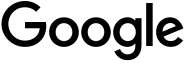

In [133]:
irin_dom = BeautifulSoup(irin.text, "lxml")
irin_dom

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>아이린 - Google 검색</title><script nonce="+8XfdUZMR3HofuwEF2CS3g==">(function(){window.google={kEI:\'pNoqXZOnGamFr7wP6cGLgA8\',kEXPI:\'0,1353804,1957,2423,1225,591,139,224,510,1065,3152,56,321,207,1017,246,961,75,202,32,208,55,6,402,10,230,1133286,1197923,327,329161,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,1334,3650,314,744,1744,328,5033,10931,279,1191,14056,867,7049,2445,2646,303,490,845,4693,10213,364,3319,5505,2442,260,1259,1800,512,1536,15,560,835,284,2,579,727,2431,1362,284,4040,4966,774,2251,4743,3118,2595,3601,669,1050,1808,1396,82,7,493,2042,8909,5297,796,101,1120,37,918,748,7,120,1217,1364,346,1,848,416,2735,2656,315,91,2,631,3240,44,650,448,12,866,12,5,7,376,152,2255,1160,1447,632,2228,656,20,76,241,235,883,448,7,447,104,1247,
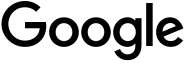

In [124]:
irin.text

In [143]:
irin_title = irin_dom.select("div > h3 > a")
                            
[i.text for i in irin_title]

["[M+포토] 레드벨벳 아이린, '안무 속 살짝쿵 윙크'",
 '\'해투4\' 모델 아이린 "레드벨벳 아이린, 나한테 스타일 영감받아"',
 '보는 사람 놀랠 정도로 순간 아찔했던 아이린 (영상)',
 '본판 불변의 법칙?…아이린, 여신 미모',
 '\'성희롱 논란\' 잼미 누구? "트위치계 \'아이린\'"',
 '레드벨벳 아이린, 발랄한 레드 포인트 룩…"요정 같아"',
 '아이린이 배우 거절하고 모델된 사연',
 "출근길 찍는 팬 카메라 피하려다 '차'에 세게 부딪힌 레드벨벳 아이린",
 "[E포토]레드벨벳 아이린, '귀여운 삐삐 머리'",
 "브이로그 찍으랬더니 얼굴 자랑만(?) 한 '신흥 유튜브 생태계 교란자' 아이린"]

In [149]:
irin_title = irin_dom.select("a.l.lLrAF ")
                            
[i.text for i in irin_title]

["[M+포토] 레드벨벳 아이린, '안무 속 살짝쿵 윙크'",
 '\'해투4\' 모델 아이린 "레드벨벳 아이린, 나한테 스타일 영감받아"',
 '보는 사람 놀랠 정도로 순간 아찔했던 아이린 (영상)',
 '본판 불변의 법칙?…아이린, 여신 미모',
 '\'성희롱 논란\' 잼미 누구? "트위치계 \'아이린\'"',
 '레드벨벳 아이린, 발랄한 레드 포인트 룩…"요정 같아"',
 '아이린이 배우 거절하고 모델된 사연',
 "출근길 찍는 팬 카메라 피하려다 '차'에 세게 부딪힌 레드벨벳 아이린",
 "[E포토]레드벨벳 아이린, '귀여운 삐삐 머리'",
 "브이로그 찍으랬더니 얼굴 자랑만(?) 한 '신흥 유튜브 생태계 교란자' 아이린"]

In [ ]:
requests.request